#Library and functions

In [ ]:
#--- Reproductibility ---
%env PYTHONHASHSEED=0
from numpy.random import seed
seed(42)
from tensorflow import keras
keras.utils.set_random_seed(42)
import tensorflow as tf
tf.config.experimental.enable_op_determinism()

#---

import numpy as np
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from collections import Counter
import PIL
import glob
from tqdm import tqdm
import networkx as nx

#Graphics
from scipy.stats import gaussian_kde
from scipy.stats import norm
import seaborn as sns
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

#NN
from tensorflow import keras
from tensorflow.keras import layers, callbacks
#import tensorflow as tf

#sklearn modules: evaluation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, classification_report, RocCurveDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelBinarizer
from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, root_mean_squared_error

#Recurrence plots
from pyts.image import RecurrencePlot
from pyts.datasets import load_gunpoint
from mpl_toolkits.axes_grid1 import ImageGrid

In [ ]:
def parameter_stratification(value):
  '''
  Assumes the parameters of the logistic map will be in the 3 to 4 range.
  Categories:
  1 - Oscillations between two values
  2 - Oscillations between four values
  3 - Oscillations between nth values, where n is even and >4
  4 - Onset of chaos
  5 - Appearance of stability islands
  '''

  #Periods
  if (value < 3.44949):
    return 1
  if ( (value >= 3.44949) and (value < 3.54409) ):
    return 2
  if ( (value >= 3.54409) and (value < 3.56995) ):
    return 3
  if ( (value >= 3.56995) and (value < 3.82843) ):
    return 4
  if ( (value >= 3.82843) ):
    return 5

# Neural net training: regression

##Architecture

In [ ]:
model = keras.Sequential([
  keras.layers.Conv2D(3, 4, activation='relu'),
  keras.layers.Conv2D(3, 4, activation='relu'),
  keras.layers.AveragePooling2D(2),
  keras.layers.Dropout(0.2),
  keras.layers.Conv2D(3, 4, activation='relu'),
  keras.layers.Conv2D(3, 4, activation='relu'),
  keras.layers.AveragePooling2D(2),
  keras.layers.Dropout(0.2),
  keras.layers.Conv2D(3, 4, activation='relu'),
  keras.layers.Conv2D(3, 4, activation='relu'),
  keras.layers.Flatten(),
  keras.layers.Dense(units=1024, activation='relu'),
  keras.layers.Dense(units=512, activation='relu'),
  keras.layers.Dense(units=256, activation='relu'),
  keras.layers.Dense(units=128, activation='relu'),
  keras.layers.Dense(units=64, activation='relu'),
  keras.layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer="adam")

## Training

In [ ]:
#Read all pngs from the train set
data_path = '/your/path/'
pngs = glob.glob(data_path + 'IC_0.*/sample*png')

ims = {}
for png in pngs:
  ims[png]=np.array(PIL.Image.open(png).convert('L'))

In [ ]:
#Questions = images
#Solutions = main parameter of the logistic map used to generated that image

questions = np.array([each for each in ims.values()]).astype(np.float32)
solutions = np.array([float(each.split('/')[-1].split('.')[0])/(1e16) for each in ims]).astype(np.float32)

In [ ]:
N_size = 100

#Train/test split (gnuplot data):
X_train, X_test, y_train, y_test = train_test_split(questions, solutions, test_size=0.3, random_state=42)

X_train = X_train.reshape(-1, N_size, N_size, 1)
X_test = X_test.reshape(-1, N_size, N_size, 1)

In [ ]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

Epoch 1/300


I0000 00:00:1727215296.095055  104124 service.cc:145] XLA service 0x7fc368003bc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727215296.095093  104124 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 2060 SUPER, Compute Capability 7.5
2024-09-24 19:01:36.190731: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-24 19:01:36.454326: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


12/71 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.2517 

I0000 00:00:1727215298.681146  104124 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 3.5254 - val_loss: 0.1320
Epoch 2/300
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0537 - val_loss: 0.0763
Epoch 3/300
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0326 - val_loss: 0.0775
Epoch 4/300
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0311 - val_loss: 0.0560
Epoch 5/300
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0259 - val_loss: 0.0418
Epoch 6/300
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0202 - val_loss: 0.0315
Epoch 7/300
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0180 - val_loss: 0.0186
Epoch 8/300
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0144 - val_loss: 0.0193
Epoch 9/300
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0144 - val_loss: 0.0199
Epoch 10/300
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0143 - val_loss: 0.0205
Epoch 11/300
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0142 - val_loss: 0.0157
Epoch 12/300
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0

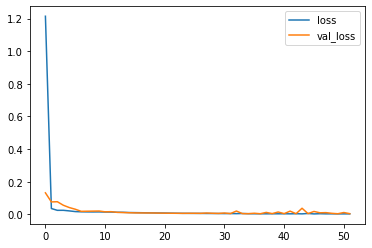

In [ ]:
#--- N=res runs ---
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=100,
    epochs=300,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=1,  # turn off training log
    shuffle=False
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

2025-02-19 19:39:35.779666: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1148000000 exceeds 10% of free system memory.
2025-02-19 19:39:36.498306: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1148000000 exceeds 10% of free system memory.


Epoch 1/300


2025-02-19 19:39:37.025548: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1148000000 exceeds 10% of free system memory.
I0000 00:00:1740004779.288921   83563 service.cc:145] XLA service 0x56414a78bb80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1740004779.288969   83563 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 2060 SUPER, Compute Capability 7.5
2025-02-19 19:39:39.361714: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-02-19 19:39:39.583966: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


  8/287 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 10.3488

I0000 00:00:1740004783.182177   83563 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1740004783.187032   83563 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


287/287 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - loss: 1.8812 - val_loss: 1.6288
Epoch 2/300
287/287 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0811 - val_loss: 0.9504
Epoch 3/300
287/287 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0449 - val_loss: 0.5576
Epoch 4/300
287/287 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0242 - val_loss: 0.2983
Epoch 5/300
287/287 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0154 - val_loss: 0.0645
Epoch 6/300
287/287 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0085 - val_loss: 0.0317
Epoch 7/300
287/287 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0063 - val_loss: 0.0153
Epoch 8/300
287/287 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0058 - val_loss: 0.0156
Epoch 9/300
287/287 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0043 - val_loss: 0.0111
Epoch 10/300
287/287 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0041 - val_loss: 0.0110
Epoch 11/300
287/287 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0031 - val_loss: 0.0093
Epoch 12/300
287/287 ━━━━━━━━━━━━━━━━━━━━

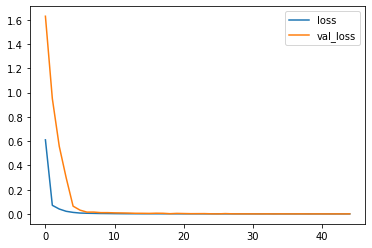

In [ ]:
#Complete region
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=100,
    epochs=300,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=1,  # turn off training log
    shuffle=False
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

2025-02-20 12:21:24.889057: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1120080000 exceeds 10% of free system memory.
2025-02-20 12:21:25.573387: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1120080000 exceeds 10% of free system memory.


Epoch 1/300


2025-02-20 12:21:26.086694: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1120080000 exceeds 10% of free system memory.
I0000 00:00:1740064888.425626   78296 service.cc:145] XLA service 0x5606aa97bbd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1740064888.425671   78296 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 2060 SUPER, Compute Capability 7.5
2025-02-20 12:21:28.473651: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-02-20 12:21:28.713847: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


 12/281 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 9.4267 

I0000 00:00:1740064892.331654   78296 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1740064892.336586   78296 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.5118

I0000 00:00:1740064899.011312   78295 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_2', 4 bytes spill stores, 4 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_1', 8 bytes spill stores, 8 bytes spill loads



281/281 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - loss: 1.5081 - val_loss: 5.2015
Epoch 2/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0780 - val_loss: 3.7720
Epoch 3/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0521 - val_loss: 2.0283
Epoch 4/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0283 - val_loss: 1.1149
Epoch 5/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0205 - val_loss: 0.6869
Epoch 6/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0205 - val_loss: 0.4921
Epoch 7/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0170 - val_loss: 0.6312
Epoch 8/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0115 - val_loss: 0.5153
Epoch 9/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0116 - val_loss: 0.5745
Epoch 10/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0125 - val_loss: 0.4675
Epoch 11/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0102 - val_loss: 0.1837
Epoch 12/300
281/281 ━━━━━━━━━━━━━━━━━━━━

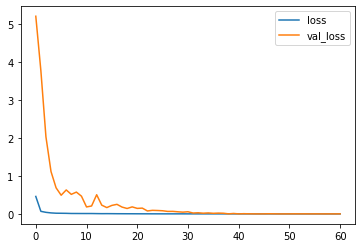

In [ ]:
#Chaotic region
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=100,
    epochs=300,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=1,  # turn off training log
    shuffle=False
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

2025-02-20 10:53:50.274838: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1120000000 exceeds 10% of free system memory.
2025-02-20 10:53:50.929439: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1120000000 exceeds 10% of free system memory.


Epoch 1/300


2025-02-20 10:53:51.438016: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1120000000 exceeds 10% of free system memory.
I0000 00:00:1740059633.731782   45701 service.cc:145] XLA service 0x55903b36f6c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1740059633.731821   45701 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 2060 SUPER, Compute Capability 7.5
2025-02-20 10:53:53.816146: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-02-20 10:53:54.037427: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


 13/280 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 7.0360

I0000 00:00:1740059637.749413   45701 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1740059637.755370   45701 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - loss: 1.2569 - val_loss: 1.9703
Epoch 2/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0724 - val_loss: 0.9721
Epoch 3/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0365 - val_loss: 0.5111
Epoch 4/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0250 - val_loss: 0.3117
Epoch 5/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0233 - val_loss: 0.4317
Epoch 6/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0206 - val_loss: 0.2660
Epoch 7/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0181 - val_loss: 0.2592
Epoch 8/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0165 - val_loss: 0.3237
Epoch 9/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0146 - val_loss: 0.2600
Epoch 10/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0141 - val_loss: 0.3663
Epoch 11/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0123 - val_loss: 0.3178
Epoch 12/300
280/280 ━━━━━━━━━━━━━━━━━━━━

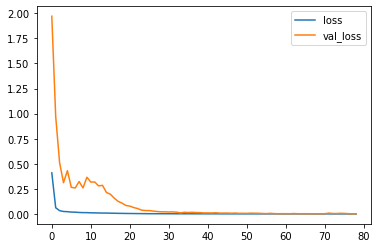

In [ ]:
#Noisy (5E-2) full region
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=100,
    epochs=300,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=1,  # turn off training log
    shuffle=False
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

2025-02-20 11:02:11.103233: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1120000000 exceeds 10% of free system memory.
2025-02-20 11:02:11.755949: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1120000000 exceeds 10% of free system memory.


Epoch 1/300


2025-02-20 11:02:12.260268: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1120000000 exceeds 10% of free system memory.
I0000 00:00:1740060134.526255   49278 service.cc:145] XLA service 0x5572b82fe450 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1740060134.526303   49278 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 2060 SUPER, Compute Capability 7.5
2025-02-20 11:02:14.574664: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-02-20 11:02:14.804519: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


  9/280 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 8.2815

I0000 00:00:1740060138.449431   49278 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1740060138.454237   49278 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - loss: 1.4268 - val_loss: 2.8432
Epoch 2/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0832 - val_loss: 1.4726
Epoch 3/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0442 - val_loss: 0.4694
Epoch 4/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0245 - val_loss: 0.3599
Epoch 5/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0210 - val_loss: 0.2746
Epoch 6/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0183 - val_loss: 0.3007
Epoch 7/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0190 - val_loss: 0.2082
Epoch 8/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0161 - val_loss: 0.3000
Epoch 9/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0138 - val_loss: 0.2715
Epoch 10/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0136 - val_loss: 0.3504
Epoch 11/300
280/280 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0130 - val_loss: 0.3363
Epoch 12/300
280/280 ━━━━━━━━━━━━━━━━━━━━

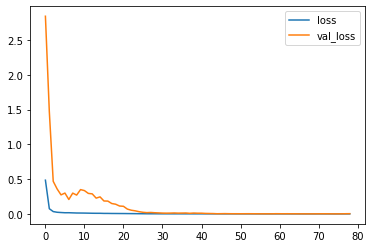

In [ ]:
#Noisy (1E-2) Chaotic region
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=100,
    epochs=300,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=1,  # turn off training log
    shuffle=False
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

Epoch 1/300


I0000 00:00:1740060604.870055   52776 service.cc:145] XLA service 0x7ff3f0003f50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1740060604.870109   52776 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 2060 SUPER, Compute Capability 7.5
2025-02-20 11:10:04.925118: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-02-20 11:10:05.161406: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


 12/210 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 8.5881

I0000 00:00:1740060608.801096   52776 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1740060608.807089   52776 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


210/210 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - loss: 2.0358 - val_loss: 2.5225
Epoch 2/300
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0908 - val_loss: 1.4980
Epoch 3/300
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0546 - val_loss: 1.0896
Epoch 4/300
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0406 - val_loss: 0.9422
Epoch 5/300
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0317 - val_loss: 0.6732
Epoch 6/300
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0261 - val_loss: 0.5398
Epoch 7/300
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0217 - val_loss: 0.4863
Epoch 8/300
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0202 - val_loss: 0.3448
Epoch 9/300
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0180 - val_loss: 0.2947
Epoch 10/300
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0163 - val_loss: 0.2354
Epoch 11/300
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0153 - val_loss: 0.2388
Epoch 12/300
210/210 ━━━━━━━━━━━━━━━━━━━━

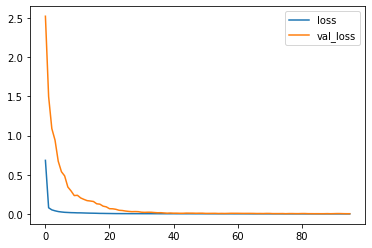

In [ ]:
#Noisy (1E-1) Chaotic region
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=100,
    epochs=300,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=1,  # turn off training log
    shuffle=False
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

##Testing

In [ ]:
#Read in pngs:
data_path = '/your/path/'
test_pngs = glob.glob(data_path + 'test/sample*png')

test_ims = {}

for png in test_pngs:
  test_ims[png]=np.array(PIL.Image.open(png).convert('L'))


#Prepare test questions and solutions as before:
test_questions = np.array([each for each in test_ims.values()]).astype(np.float32)
test_solutions = np.array([float(each.split('_')[-1].split('.')[0])/(1e16)
                            for each in test_ims]).astype(np.float32)

#Apply model:
test_answers = model.predict(test_questions)

# Neural net training: classification

##Architecture

In [ ]:
model = keras.Sequential([
  keras.layers.Conv2D(3, 4),
  keras.layers.Conv2D(3, 4),
  keras.layers.Activation('relu'),
  keras.layers.AveragePooling2D(2),
  keras.layers.Dropout(0.2),
  keras.layers.Conv2D(3, 4),
  keras.layers.Conv2D(3, 4),
  keras.layers.Activation('relu'),
  keras.layers.AveragePooling2D(2),
  keras.layers.Dropout(0.2),
  keras.layers.Conv2D(3, 4),
  keras.layers.Conv2D(3, 4),
  keras.layers.Activation('relu'),
  keras.layers.AveragePooling2D(2),
  keras.layers.Dropout(0.2),
  keras.layers.Flatten(),
  keras.layers.Dense(units=1024, activation='relu'),
  keras.layers.Dense(units=512, activation='relu'),
  keras.layers.Dense(units=256, activation='relu'),
  keras.layers.Dense(units=128, activation='relu'),
  keras.layers.Dense(units=64, activation='relu'),
  keras.layers.Dense(units=6, activation='softmax')
])

model.compile(loss='CategoricalCrossentropy', optimizer="adam", metrics=['accuracy'])

## Training

In [ ]:
#Read all pngs from the train set
data_path = '/your/path/'
pngs = glob.glob(data_path + 'IC_0.*/sample*png')

ims = {}
for png in pngs:
    ims[png]=np.array(PIL.Image.open(png).convert('L'))

In [ ]:
#Questions = images
#Solutions = a parameter that generated that image

questions = np.array([each for each in ims.values()]).astype(np.float32)
solutions_swp = np.array([float(each.split('/')[-1].split('.')[0])/(1e16)
                            for each in ims]).astype(np.float32)

solutions = []
for n in solutions_swp:
  solutions.append(parameter_stratification(n))

In [ ]:
N_size = 100

#Train/test split (gnuplot data):
X_train, X_test, y_train, y_test = train_test_split(questions, solutions, test_size=0.3, random_state=42)

X_train = X_train.reshape(-1, N_size, N_size, 1)
X_test = X_test.reshape(-1, N_size, N_size, 1)

In [ ]:
# Get one hot encoding
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [ ]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

2025-02-20 11:24:35.712908: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1148000000 exceeds 10% of free system memory.
2025-02-20 11:24:36.402660: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1148000000 exceeds 10% of free system memory.


Epoch 1/300


2025-02-20 11:24:36.939118: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1148000000 exceeds 10% of free system memory.
I0000 00:00:1740061479.369397   60019 service.cc:145] XLA service 0x55cc74abb360 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1740061479.369421   60019 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 2060 SUPER, Compute Capability 7.5
2025-02-20 11:24:39.420348: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-02-20 11:24:39.656472: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


 12/287 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.4319 - loss: 1.6084

I0000 00:00:1740061484.803284   60019 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_2', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1740061484.810044   60019 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


287/287 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.7298 - loss: 0.7383 - val_accuracy: 0.8107 - val_loss: 0.3363
Epoch 2/300
287/287 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.8907 - loss: 0.2621 - val_accuracy: 0.9208 - val_loss: 0.2297
Epoch 3/300
287/287 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9156 - loss: 0.2186 - val_accuracy: 0.9372 - val_loss: 0.1752
Epoch 4/300
287/287 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9290 - loss: 0.1825 - val_accuracy: 0.9430 - val_loss: 0.1659
Epoch 5/300
287/287 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9365 - loss: 0.1676 - val_accuracy: 0.9447 - val_loss: 0.1533
Epoch 6/300
287/287 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9398 - loss: 0.1570 - val_accuracy: 0.9523 - val_loss: 0.1484
Epoch 7/300
287/287 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9456 - loss: 0.1465 - val_accuracy: 0.9569 - val_loss: 0.1316
Epoch 8/300
287/287 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9488 - loss: 0.1406 - val_accurac

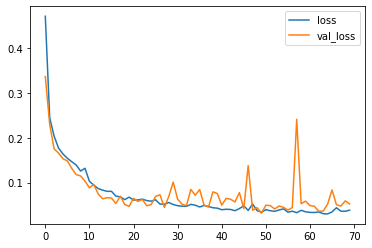

In [ ]:
#Complete region
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=100,
    epochs=300,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=1,  # turn off training log
    shuffle=False
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

2025-02-20 11:16:47.511651: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1120080000 exceeds 10% of free system memory.
2025-02-20 11:16:48.193400: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1120080000 exceeds 10% of free system memory.


Epoch 1/300


2025-02-20 11:16:48.724118: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1120080000 exceeds 10% of free system memory.
I0000 00:00:1740061011.161309   56638 service.cc:145] XLA service 0x7f8730014690 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1740061011.161337   56638 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 2060 SUPER, Compute Capability 7.5
2025-02-20 11:16:51.212971: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-02-20 11:16:51.459079: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


 11/281 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.4897 - loss: 1.3572

I0000 00:00:1740061016.580958   56638 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_2', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1740061016.590641   56638 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


281/281 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - accuracy: 0.6497 - loss: 0.7348 - val_accuracy: 0.8714 - val_loss: 0.2894
Epoch 2/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8663 - loss: 0.3075 - val_accuracy: 0.9023 - val_loss: 0.2432
Epoch 3/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8883 - loss: 0.2651 - val_accuracy: 0.9059 - val_loss: 0.2348
Epoch 4/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.8974 - loss: 0.2421 - val_accuracy: 0.9234 - val_loss: 0.2216
Epoch 5/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9053 - loss: 0.2298 - val_accuracy: 0.9272 - val_loss: 0.2090
Epoch 6/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9168 - loss: 0.2076 - val_accuracy: 0.9344 - val_loss: 0.1857
Epoch 7/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9220 - loss: 0.1975 - val_accuracy: 0.9369 - val_loss: 0.1843
Epoch 8/300
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9262 - loss: 0.1882 - val_accurac

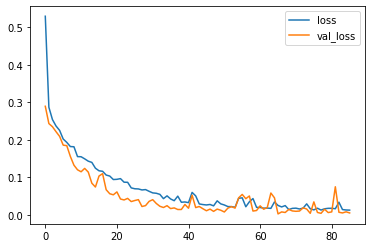

In [ ]:
#Chaotic region
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=100,
    epochs=300,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=1,  # turn off training log
    shuffle=False
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

##Testing

###Complete region

In [ ]:
data_path = '/your/path/'
test_pngs = glob.glob(data_path + 'test/sample*png')

test_ims = {}

for png in test_pngs:
    test_ims[png]=np.array(PIL.Image.open(png).convert('L'))

test_questions = np.array([each for each in test_ims.values()]).astype(np.float32)
test_solutions_swp = np.array([float(each.split('/')[-1].split('.')[0])/(1e16)
                            for each in test_ims]).astype(np.float32)

test_solutions = []
for n in test_solutions_swp:
  test_solutions.append(parameter_stratification(n))

In [ ]:
#Apply model:
test_answers = model.predict(test_questions)

test_answers_classes = [np.argmax(y, axis=None, out=None) for y in test_answers]
print('Accuracy:', accuracy_score(test_answers_classes, test_solutions))

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
Accuracy: 0.988


In [ ]:
#le = LabelEncoder()
#test_y_swp = le.fit_transform(test_y)

label_binarizer = LabelBinarizer().fit(test_solutions)
test_y_swp = label_binarizer.transform(test_solutions)
pred_y_swp = label_binarizer.transform(test_answers_classes)

In [ ]:
report = classification_report(test_solutions, test_answers_classes, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report

,precision,recall,f1-score,support
1,1.000000,0.995444,0.997717,439.000
2,0.978947,1.000000,0.989362,93.000
3,1.000000,0.909091,0.952381,22.000
4,0.992308,0.973585,0.982857,265.000
5,0.957447,0.994475,0.975610,181.000
accuracy,0.988000,0.988000,0.988000,0.988
macro avg,0.985740,0.974519,0.979585,1000.000
weighted avg,0.988302,0.988000,0.988003,1000.000


###Chaotic region

In [ ]:
data_path = '/your/path/'
test_pngs = glob.glob(data_path + 'test/sample*png')

test_ims = {}

for png in test_pngs:
    test_ims[png]=np.array(PIL.Image.open(png).convert('L'))

test_questions = np.array([each for each in test_ims.values()]).astype(np.float32)
test_solutions_swp = np.array([float(each.split('_')[-1].split('.')[0])/(1e16)
                            for each in test_ims]).astype(np.float32)

test_solutions = []
for n in test_solutions_swp:
  test_solutions.append(parameter_stratification(n))

In [ ]:
#Apply model:
test_answers = model.predict(test_questions)

test_answers_classes = [np.argmax(y, axis=None, out=None) for y in test_answers]
print('Accuracy:', accuracy_score(test_answers_classes, test_solutions))

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
Accuracy: 0.985


In [ ]:
#le = LabelEncoder()
#test_y_swp = le.fit_transform(test_y)

label_binarizer = LabelBinarizer().fit(test_solutions)
test_y_swp = label_binarizer.transform(test_solutions)
pred_y_swp = label_binarizer.transform(test_answers_classes)

In [ ]:
report = classification_report(test_solutions, test_answers_classes, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report

,precision,recall,f1-score,support
3,0.944444,1.000000,0.971429,17.000
4,0.993344,0.981908,0.987593,608.000
5,0.973753,0.989333,0.981481,375.000
accuracy,0.985000,0.985000,0.985000,0.985
macro avg,0.970514,0.990414,0.980168,1000.000
weighted avg,0.985166,0.985000,0.985026,1000.000


#Metrics

###Average c and RMSE

In [ ]:
print('=== No noise, full ===')

df_res = pd.read_csv('NN_RP_logisticmap_full_no_noise_3x4.csv', index_col=0)
df_res['diff'] = np.abs(df_res['test_actual'] - df_res['test_predictions'])

df_res['diff_0.001'] = df_res['diff'].values < 0.001
df_res['diff_0.01'] = df_res['diff'].values < 0.01
df_res['diff_0.1'] = df_res['diff'].values < 0.1

#--- New metric ---
print('Percentage of predictions within 0.001 precision:', np.sum(df_res['diff_0.001'].values)/len(df_res)*100, '%')
print('Percentage of predictions within 0.01 precision:', np.sum(df_res['diff_0.01'].values)/len(df_res)*100, '%')
print('Percentage of predictions within 0.1 precision:', np.sum(df_res['diff_0.1'].values)/len(df_res)*100, '%')

print('---')

print('RMSE:', np.round(root_mean_squared_error(df_res['test_actual'].values, df_res['test_predictions'].values), 4))

=== No noise ===
Percentage of predictions within 0.001 precision: 2.3 %
Percentage of predictions within 0.01 precision: 27.500000000000004 %
Percentage of predictions within 0.1 precision: 97.6 %
---
RMSE: 0.0416


In [ ]:
print('=== No noise, chaotic ===')

df_res = pd.read_csv('NN_RP_logisticmap_chaotic_no_noise_3x4.csv', index_col=0)
df_res['diff'] = np.abs(df_res['test_actual'] - df_res['test_predictions'])

df_res['diff_0.001'] = df_res['diff'].values < 0.001
df_res['diff_0.01'] = df_res['diff'].values < 0.01
df_res['diff_0.1'] = df_res['diff'].values < 0.1

#--- New metric ---
print('Percentage of predictions within 0.001 precision:', np.sum(df_res['diff_0.001'].values)/len(df_res)*100, '%')
print('Percentage of predictions within 0.01 precision:', np.sum(df_res['diff_0.01'].values)/len(df_res)*100, '%')
print('Percentage of predictions within 0.1 precision:', np.sum(df_res['diff_0.1'].values)/len(df_res)*100, '%')

print('---')

print('RMSE:', np.round(root_mean_squared_error(df_res['test_actual'].values, df_res['test_predictions'].values), 4))

=== No noise, chaotic ===
Percentage of predictions within 0.001 precision: 3.2 %
Percentage of predictions within 0.01 precision: 31.3 %
Percentage of predictions within 0.1 precision: 98.4 %
---
RMSE: 0.0334


In [ ]:
print('=== 5E-2 noise ===')

df_res = pd.read_csv('NN_RP_logisticmap_full_5em2_noise_3x4.csv', index_col=0)
df_res['diff'] = np.abs(df_res['test_actual'] - df_res['test_predictions'])

df_res['diff_0.001'] = df_res['diff'].values < 0.001
df_res['diff_0.01'] = df_res['diff'].values < 0.01
df_res['diff_0.1'] = df_res['diff'].values < 0.1

#--- New metric ---
print('Percentage of predictions within 0.001 precision:', np.sum(df_res['diff_0.001'].values)/len(df_res)*100, '%')
print('Percentage of predictions within 0.01 precision:', np.sum(df_res['diff_0.01'].values)/len(df_res)*100, '%')
print('Percentage of predictions within 0.1 precision:', np.sum(df_res['diff_0.1'].values)/len(df_res)*100, '%')

print('---')

print('RMSE:', np.round(root_mean_squared_error(df_res['test_actual'].values, df_res['test_predictions'].values), 4))

=== 5E-2 noise ===
Percentage of predictions within 0.001 precision: 1.3 %
Percentage of predictions within 0.01 precision: 12.4 %
Percentage of predictions within 0.1 precision: 96.2 %
---
RMSE: 0.0517


In [ ]:
print('=== 1E-2 noise ===')

df_res = pd.read_csv('NN_RP_logisticmap_full_1em2_noise_3x4.csv', index_col=0)
df_res['diff'] = np.abs(df_res['test_actual'] - df_res['test_predictions'])

df_res['diff_0.001'] = df_res['diff'].values < 0.001
df_res['diff_0.01'] = df_res['diff'].values < 0.01
df_res['diff_0.1'] = df_res['diff'].values < 0.1

#--- New metric ---
print('Percentage of predictions within 0.001 precision:', np.sum(df_res['diff_0.001'].values)/len(df_res)*100, '%')
print('Percentage of predictions within 0.01 precision:', np.sum(df_res['diff_0.01'].values)/len(df_res)*100, '%')
print('Percentage of predictions within 0.1 precision:', np.sum(df_res['diff_0.1'].values)/len(df_res)*100, '%')

print('---')

print('RMSE:', np.round(root_mean_squared_error(df_res['test_actual'].values, df_res['test_predictions'].values), 4))

=== 1E-2 noise ===
Percentage of predictions within 0.001 precision: 1.4000000000000001 %
Percentage of predictions within 0.01 precision: 17.9 %
Percentage of predictions within 0.1 precision: 98.1 %
---
RMSE: 0.0477


In [ ]:
print('=== 1E-1 noise ===')

df_res = pd.read_csv('NN_RP_logisticmap_full_1em1_noise_3x4.csv', index_col=0)
df_res['diff'] = np.abs(df_res['test_actual'] - df_res['test_predictions'])

df_res['diff_0.001'] = df_res['diff'].values < 0.001
df_res['diff_0.01'] = df_res['diff'].values < 0.01
df_res['diff_0.1'] = df_res['diff'].values < 0.1

#--- New metric ---
print('Percentage of predictions within 0.001 precision:', np.sum(df_res['diff_0.001'].values)/len(df_res)*100, '%')
print('Percentage of predictions within 0.01 precision:', np.sum(df_res['diff_0.01'].values)/len(df_res)*100, '%')
print('Percentage of predictions within 0.1 precision:', np.sum(df_res['diff_0.1'].values)/len(df_res)*100, '%')

print('---')

print('RMSE:', np.round(root_mean_squared_error(df_res['test_actual'].values, df_res['test_predictions'].values), 4))

=== 1E-1 noise ===
Percentage of predictions within 0.001 precision: 2.3 %
Percentage of predictions within 0.01 precision: 13.600000000000001 %
Percentage of predictions within 0.1 precision: 86.1 %
---
RMSE: 0.0683


###RMSE and c per class

In [ ]:
df_res = pd.read_csv('/home/llober/NN_RP_logisticmap_full_no_noise_3x4.csv', index_col=0)
df_res['diff'] = np.abs(df_res['test_actual'] - df_res['test_predictions'])

df_res['diff_0.001'] = df_res['diff'].values < 0.001
df_res['diff_0.01'] = df_res['diff'].values < 0.01
df_res['diff_0.1'] = df_res['diff'].values < 0.1

par_classes_actual = []
par_classes_answers = []

for n in range(len(df_res)):
  par_classes_actual.append( parameter_stratification(df_res['test_actual'].values[n]) )
  par_classes_answers.append( parameter_stratification(df_res['test_predictions'].values[n]) )

df_res['test_actual_class'] = par_classes_actual
df_res['test_predictions_class'] = par_classes_answers

In [ ]:
for n in df_res['test_actual_class'].unique():
  swp = df_res.loc[df_res['test_actual_class'] == n]

  print('=== CLASS', n, '===')
  print('Percentage of predictions within 0.001 precision:', np.sum(swp['diff_0.001'].values)/len(swp)*100, '%')
  print('Percentage of predictions within 0.01 precision:', np.sum(swp['diff_0.01'].values)/len(swp)*100, '%')
  print('Percentage of predictions within 0.1 precision:', np.sum(swp['diff_0.1'].values)/len(swp)*100, '%')
  print('RMSE for class', n ,':', np.round(root_mean_squared_error(swp['test_actual'].values, swp['test_predictions'].values), 4))

=== CLASS 1 ===
Percentage of predictions within 0.001 precision: 3.8724373576309796 %
Percentage of predictions within 0.01 precision: 42.8246013667426 %
Percentage of predictions within 0.1 precision: 98.17767653758543 %
RMSE for class 1 : 0.0375
=== CLASS 4 ===
Percentage of predictions within 0.001 precision: 0.37735849056603776 %
Percentage of predictions within 0.01 precision: 13.20754716981132 %
Percentage of predictions within 0.1 precision: 99.62264150943396 %
RMSE for class 4 : 0.0375
=== CLASS 5 ===
Percentage of predictions within 0.001 precision: 1.1049723756906076 %
Percentage of predictions within 0.01 precision: 9.392265193370166 %
Percentage of predictions within 0.1 precision: 91.71270718232044 %
RMSE for class 5 : 0.0606
=== CLASS 2 ===
Percentage of predictions within 0.001 precision: 3.225806451612903 %
Percentage of predictions within 0.01 precision: 36.55913978494624 %
Percentage of predictions within 0.1 precision: 100.0 %
RMSE for class 2 : 0.0235
=== CLASS 3 =

In [ ]:
df_res = pd.read_csv('/home/llober/NN_RP_logisticmap_chaotic_no_noise_3x4.csv', index_col=0)
df_res['diff'] = np.abs(df_res['test_actual'] - df_res['test_predictions'])

df_res['diff_0.001'] = df_res['diff'].values < 0.001
df_res['diff_0.01'] = df_res['diff'].values < 0.01
df_res['diff_0.1'] = df_res['diff'].values < 0.1

par_classes_actual = []
par_classes_answers = []

for n in range(len(df_res)):
  par_classes_actual.append( parameter_stratification(df_res['test_actual'].values[n]) )
  par_classes_answers.append( parameter_stratification(df_res['test_predictions'].values[n]) )

df_res['test_actual_class'] = par_classes_actual
df_res['test_predictions_class'] = par_classes_answers

In [ ]:
for n in df_res['test_actual_class'].unique():
  swp = df_res.loc[df_res['test_actual_class'] == n]

  print('=== CLASS', n, '===')
  print('Percentage of predictions within 0.001 precision:', np.sum(swp['diff_0.001'].values)/len(swp)*100, '%')
  print('Percentage of predictions within 0.01 precision:', np.sum(swp['diff_0.01'].values)/len(swp)*100, '%')
  print('Percentage of predictions within 0.1 precision:', np.sum(swp['diff_0.1'].values)/len(swp)*100, '%')
  print('RMSE for class', n ,':', np.round(root_mean_squared_error(swp['test_actual'].values, swp['test_predictions'].values), 4))

=== CLASS 5 ===
Percentage of predictions within 0.001 precision: 2.4 %
Percentage of predictions within 0.01 precision: 22.933333333333334 %
Percentage of predictions within 0.1 precision: 95.73333333333333 %
RMSE for class 5 : 0.0475
=== CLASS 4 ===
Percentage of predictions within 0.001 precision: 3.7828947368421053 %
Percentage of predictions within 0.01 precision: 37.33552631578947 %
Percentage of predictions within 0.1 precision: 100.0 %
RMSE for class 4 : 0.0206
=== CLASS 3 ===
Percentage of predictions within 0.001 precision: 0.0 %
Percentage of predictions within 0.01 precision: 0.0 %
Percentage of predictions within 0.1 precision: 100.0 %
RMSE for class 3 : 0.0235
